In [3]:
import numpy as np
from ast import literal_eval
from pysr import PySRRegressor

#  Load model -- Replace with your own model
model = PySRRegressor.from_file('hall_of_fame_2023-09-28_093024.079.pkl')
model.sympy()

Checking if hall_of_fame_2023-09-28_093024.079.pkl exists...
Loading model from hall_of_fame_2023-09-28_093024.079.pkl


11.0717240678356*((5.379406*x0 + x3)/x2 + x4/x1)/x0

##################################
R2: 0.9904549373375835
MAE: 3.1587582948742123
##################################


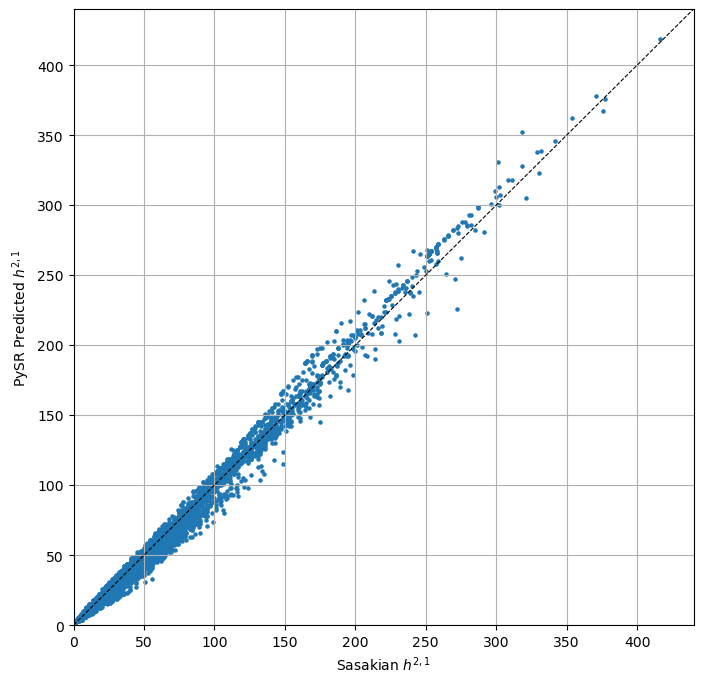

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
#Import sasakian hodge
Sweights, SHodge = [], []
with open('Data/Topological_Data.txt','r') as file:
    for idx, line in enumerate(file.readlines()[1:]):
        if idx%6 == 0: Sweights.append(eval(line))
        if idx%6 == 2: SHodge.append(eval(line))
Sweights = np.array(Sweights)        
SHodge  = np.array(SHodge)

prediction = np.round(model.predict(Sweights))

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

ax.scatter(SHodge[:,1], prediction, s=5, alpha=1)
ax.plot([0, 450], [0, 450], color = 'black', alpha=1, linewidth = 0.8, linestyle = '--')

ax.set_xlim(0, 440)  # Set the X-axis range from 0 to 6
ax.set_ylim(0, 440)  # Set the Y-axis range from 0 to 6

ax.set_xlabel(r'Sasakian $h^{2,1}$')
ax.set_ylabel(r'PySR Predicted $h^{2,1}$')
plt.grid()
plt.savefig('SymReg_Hodge.pdf')

print("##################################")
print("R2:", r2_score(model.predict(Sweights), SHodge[:,1]))
print("MAE:", mean_absolute_error(model.predict(Sweights), SHodge[:,1]))
print("##################################")